# Исследование объявлений о продаже квартир

### Содержание


- [**Шаг 1. Общая информация о данных**](#part_1)
    - [1.1. Введение в проект](#101)
    - [1.2. Описание данных](#102)
    - [1.3. Выводы из общей информации о данных](#103)


- [**Шаг 2. Предобработка данных**](#part_2)
    - [2.1. Обработка текстовых данных](#201)
    - [2.2. Изменение типов данных](#202)
    - [2.3. Фильтрация выбросов](#203)
    - [2.4. Пропуски в номинативных данных](#204)
    - [2.5. Пропуски в дискретных данных](#205)
    - [2.6. Пропуски в непрерывных данных](#206)
    - [2.7. Дубликаты](#207)
    - [2.8. Выводы из предобработки данных](#208)


- [**Шаг 3. Подсчет дополнительных параметров**](#part_3)
    - [3.1. Цена квадратного метра](#301)
    - [3.2. День недели, месяц и год публикации](#302)
    - [3.3. Этаж квартиры](#303)
    - [3.4. Соотношение жилой и общей площади, отношение площади кухни к общей](#304)


- [**Шаг 4. Исследовательский анализ данных**](#part_4)
    - [4.1. Обработка редких и выбивающихся значений](#401)
    - [4.2. Изучение параметров: площадь, цена, число комнат, высота потолков](#402)
    - [4.3. Изучение времени продажи квартиры](#403)
    - [4.4. Какие факторы больше всего влияют на стоимость квартиры?](#404)
    - [4.5. 10 населенных пунктов с наибольшим числом объявлений](#405)
    - [4.6. Определение центральной области Санкт-Петербурга по средней цене](#406)
    - [4.7. Изучение сегмента квартир в центре Санкт-Петербурга](#407)


- [**Шаг 5. Общий вывод**](#part_5)

<a id='part_1'></a>
## Шаг 1. Общая информация о данных

<a id='101'></a>
### Введение в проект

Доступен архив объявлений с сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за последние несколько лет. При этом по каждой квартире доступны два вида данных: одни вписаны пользователями вручную, другие получены автоматически на основе картографических данных. Задача — установить параметры, определяющие рыночную стоимость квартир. Это позволит улучшить автоматическую систему, отслеживающую аномалии и мошенническую деятельность.

<a id='102'></a>
### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах(м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [1]:
# вызов нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# чтение файла с данными
original_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
real_estate_data = original_data.copy()

# применение настроек отображения данных
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

При первом выводе таблицы оказалось, что данные склеены, поэтому добавлю разделяющий символ при чтении CSV-файла.

In [3]:
# вывод первых 10 строк таблицы
real_estate_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,nan,0.00,nan,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,nan,0.00,nan,nan
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,nan,0.00,nan,289.00


In [4]:
# общая информация о таблице
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Некоторые столбцы можно переименовать для удобства:

In [5]:
# приведение названий столбцов к общему виду
real_estate_data.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest',
    'studio': 'is_studio',
    'open_plan': 'is_open_plan',
    'first_day_exposition': 'first_exposition_day'},
    inplace=True)

Также создам расширенную таблицу с информацией о столбцах: она будет включать описательные статистики, количество нулей и пропусков, тип данных и описание данных в столбцах, которое указано в задании. Сначала создам переменную с описаниями данных, выстроенными в нужном порядке, затем напишу функцию для вызова таблицы с актуальной информацией о данных.

In [6]:
# создание переменной с описанием данных
col_desc = ['число фотографий квартиры в объявлении',
            'цена на момент снятия с публикации',
            'площадь квартиры в квадратных метрах (м²)',
            'дата публикации',
            'число комнат',
            'высота потолков (м)',
            'всего этажей в доме',
            'жилая площадь в квадратных метрах (м²)',
            'этаж',
            'апартаменты (булев тип)',
            'квартира-студия (булев тип)',
            'свободная планировка (булев тип)',
            'площадь кухни в квадратных метрах (м²)',
            'число балконов',
            'название населённого пункта',
            'расстояние до ближайшего аэропорта в метрах (м)',
            'расстояние до центра города (м)',
            'число парков в радиусе 3 км',
            'расстояние до ближайшего парка (м)',
            'число водоёмов в радиусе 3 км',
            'расстояние до ближайшего водоёма (м)',
            'сколько дней было размещено объявление (от публикации до снятия)']

col_desc_info = pd.DataFrame({
    'name': real_estate_data.columns,
    'col_desc': col_desc}).set_index('name').rename_axis(None)

In [7]:
# функция для вызова таблицы с информацией
def rich_info(data: 'df') -> 'df':
    '''
    Функция возвращает датафрейм с типами данных, количеством нулей и пропусков, 
    описательной статистикой и текстовым описанием столбцов датафрейма из аргумента
    '''
    return (data
            .dtypes.to_frame(name='dtypes')
            .join(data.isnull().sum().to_frame(name='nans'))
            .join(data.isin([0]).sum().to_frame(name='zeros'))
            .join(data.describe().transpose())
            .join(col_desc_info))

In [8]:
# вывод готовой таблицы через функцию
rich_info(real_estate_data)

,dtypes,nans,zeros,count,mean,std,min,25%,50%,75%,max,col_desc
total_images,int64,0,1059,23699.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00,число фотографий квартиры в объявлении
last_price,float64,0,0,23699.00,6541548.77,10887013.27,12190.00,3400000.00,4650000.00,6800000.00,763000000.00,цена на момент снятия с публикации
total_area,float64,0,0,23699.00,60.35,35.65,12.00,40.00,52.00,69.90,900.00,площадь квартиры в квадратных метрах (м²)
first_exposition_day,object,0,0,nan,nan,nan,nan,nan,nan,nan,nan,дата публикации
rooms,int64,0,197,23699.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00,число комнат
ceiling_height,float64,9195,0,14504.00,2.77,1.26,1.00,2.52,2.65,2.80,100.00,высота потолков (м)
floors_total,float64,86,0,23613.00,10.67,6.60,1.00,5.00,9.00,16.00,60.00,всего этажей в доме
living_area,float64,1903,0,21796.00,34.46,22.03,2.00,18.60,30.00,42.30,409.70,жилая площадь в квадратных метрах (м²)
floor,int64,0,0,23699.00,5.89,4.89,1.00,2.00,4.00,8.00,33.00,этаж
is_apartment,object,20924,2725,nan,nan,nan,nan,nan,nan,nan,nan,апартаменты (булев тип)


<a id='103'></a>
### Выводы из общей информации о данных

1. Данные соответствуют описанию.
1. На первый взгляд, нет полностью дублированных категорий. Возможны скрытые дубликаты в *locality_name*.
1. Некоторые типы данных нужно изменить:
    - *first_exposition_day → datetime*. Сейчас даты склеены и неудобны для анализа; в таком виде к ним неприменимы методы работы с датами.
    - *is_apartment → bool*. Из-за пропусков тип данных некорректен.
    - *last_price → int*. Судя по таблицам, цена не указана в дробных числах, поэтому от лишних нулей можно избавиться.
    - *floors_total, balcony, parks_around3000, ponds_around3000, days_exposition → int*. В этих столбцах дробные значения невозможны по смыслу.
1. В *rooms* и *airports_nearest* встречаются нелогичные нули. Также много пропусков.
1. Во всех числовых данных средние значения превышают медиану — данные распределены ассиметрично, с «тяжелым» хвостом. Также во многих случаях заметен большой разброс данных, есть выбросы.

<a id='part_2'></a>
## Шаг 2. Предобработка данных

Я разделю предобработку по типам данных: текстовые, номинативные, дискретные, непрерывные. Проверю данные на явные и скрытые дубликаты, заменю неправильные типы данных, попробую заполнить пропуски (согласно их типу) — возможно, не для всех найдутся подходящие значения, тогда оставлю их пустыми.

<a id='201'></a>
### Обработка текстовых данных

К текстовым относятся только названия населенных пунктов в столбце *locality_name*. Сначала просмотрю еще раз, какие значения здесь встречаются:

In [9]:
real_estate_data['locality_name'].value_counts(dropna=False).head(45)

Санкт-Петербург              15721
посёлок Мурино                 522
посёлок Шушары                 440
Всеволожск                     398
Пушкин                         369
Колпино                        338
посёлок Парголово              327
Гатчина                        307
деревня Кудрово                299
Выборг                         237
Петергоф                       201
Сестрорецк                     183
Красное Село                   178
Кудрово                        173
деревня Новое Девяткино        144
Сертолово                      142
Ломоносов                      133
Кириши                         125
Сланцы                         112
Волхов                         111
Тосно                          104
Кингисепп                      104
Кронштадт                       96
Никольское                      93
Коммунар                        89
Сосновый Бор                    87
Кировск                         84
Отрадное                        80
посёлок Бугры       

In [10]:
len(real_estate_data['locality_name'].value_counts())

364

В столбце 49 пропусков. Также заметны две потенциальные проблемы (на примере Мурино):
- слово «поселок» пишется через «е» и «ё», это приводит к дубликатам — в частности, поселок Мурино из-за этого встречается дважды;
- добавленные обозначения типа «поселок» или «деревня» также могут привести к дубликатам — кроме двух вариантов написания «поселок Мурино» оно еще встречается без этого слова; т.е. 3 категории там, где должна быть одна.


Для решения проблемы исправлю в столбце все «ё» на «е», оставлю в значениях только имена собственные, а 49 пропусков можно удалить, это небольшое количество относительно всей таблицы.

In [11]:
# замена всех «ё» на «е»
real_estate_data['locality_name'] = real_estate_data['locality_name'].str.replace('ё', 'е')

In [12]:
# какую долю занимают пропуски
print('Процент пропусков в locality_name: {:.2%}'.format(
    len(real_estate_data.query('locality_name.isna()')) / len(real_estate_data)))

# удаление строк с пропусками в locality_name
real_estate_data.dropna(subset=['locality_name'], inplace=True)

# проверка
print('Осталось пропусков:', len(real_estate_data.query('locality_name.isna()')))

Процент пропусков в locality_name: 0.21%
Осталось пропусков: 0


Все добавленные обозначения населенных пунктов написаны строчными буквами, это позволит очистить данные от них через удаление всех слов в нижнем регистре. Результат сохраню в отдельный столбец:

In [13]:
# создание нового столбца locality_clear с названиями населенных пунктов без слов в нижнем регистре
real_estate_data['locality_clear'] = (real_estate_data
                                      .query('locality_name.notna()')['locality_name']
                                      .apply(lambda x: ' '.join(w for w in x.split() if not w.islower())))

# проверка
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(real_estate_data['locality_clear'].value_counts().head(10))

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_clear, dtype: int64

In [14]:
len(real_estate_data['locality_name'].value_counts())

330

Путаницу «ё» и «е» можно объяснить ошибками и непоследовательностью при вводе данных. Но интересно, почему одни и те же населенные пункты были записаны как с дополнительными обозначениями, так и без них. На примере того же Мурино: до 2019 года он был поселком, а потом ему присвоили статус города; поэтому из «поселка Мурино» он превратился в просто «Мурино». Т.к. последний год в датах как раз 2019, то и таких значений оказалось всего 34. В итоге количество категорий сократилось на 34.

<a id='202'></a>
### Изменение типов данных

In [15]:
# перевод столбца с датами из onject в datetime64
real_estate_data['first_exposition_day'] = pd.to_datetime(
    real_estate_data['first_exposition_day'], format='%Y.%m.%dT%H:%M:%S')
real_estate_data['first_exposition_day'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_exposition_day, dtype: datetime64[ns]

Теперь с датами можно работать. Часы, минуты и секунды не сохранились, т.к. о них не было данных — везде было указано 00:00:00.

In [16]:
# перевод столбцов из float64 в int64
for column in ['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    real_estate_data.loc[real_estate_data[column].notna(), column] = \
        real_estate_data.loc[real_estate_data[column].notna(),
                             column].astype('int64')

In [17]:
# проверка
real_estate_data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_exposition_day    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
is_studio                         bool
is_open_plan                      bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
locality_clear                  object
dtype: object

Все столбцы кроме *last_price* не изменили тип данных, т.к. в них есть пропуски. При полном избавлении от пропусков столбцы примут нужный вид.

<a id='203'></a>
### Фильтрация выбросов

Для заполнения пропусков в числовых данных есть смысл сначала отфильтровать их по выбросам, иначе будет только больше данных, непригодных для анализа типичных случаев. Сначала посмотрю с помощью описательных статистик, какая разница между минимальными/максимальными значениями и ближайшими к ним квантилями, чтобы оценить степень разброса данных. Также посчитаю, сколько данных в каждом столбце приходится на выбросы. И напишу функцию для создания отфильтрованной таблицы, откуда в дальнейшем возьму данные для заполнения пропусков.

In [18]:
# вывод описательной статистики с расширенным набором квантилей для оценки разброса данных
(real_estate_data
 [real_estate_data.select_dtypes(include=['int64', 'float64']).columns]
 .describe(percentiles=[.01, .95, .96, .97, .98, .99]))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.00,23650.00,23650.00,23650.00,14490.00,23565.00,21752.00,23650.00,21381.00,12137.00,18116.00,18139.00,18140.00,8064.00,18140.00,9085.00,20470.00
mean,9.86,6541126.90,60.33,2.07,2.77,10.68,34.45,5.89,10.57,1.15,28803.23,14197.86,0.61,490.83,0.77,518.06,180.75
std,5.68,10896399.18,35.66,1.08,1.26,6.59,22.04,4.88,5.90,1.07,12637.31,8606.83,0.80,342.55,0.94,277.84,219.78
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
1%,0.00,1000000.00,25.17,1.00,2.50,2.00,13.00,1.00,5.00,0.00,9412.15,1327.38,0.00,24.00,0.00,35.00,4.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26756.50,13105.00,0.00,454.50,1.00,502.00,95.00
95%,20.00,15300000.00,116.00,4.00,3.30,25.00,69.00,16.00,20.00,2.00,51340.00,31651.10,2.00,968.00,3.00,977.00,647.55
96%,20.00,17000000.00,125.00,4.00,3.35,25.00,74.80,17.00,22.00,3.56,52108.00,32799.32,2.00,1079.00,3.00,998.00,710.24
97%,20.00,20000000.00,139.50,4.00,3.47,25.00,81.60,19.00,24.00,4.00,53162.00,34147.86,3.00,1264.00,3.00,1028.44,789.93
98%,20.00,25000000.00,159.00,5.00,3.54,25.00,94.54,21.00,28.00,5.00,54337.00,35511.00,3.00,1514.00,3.00,1087.00,900.00


In [19]:
# создание фильтра выбросов
def outliers_filtered_data(column: 'string') -> 'df':
    '''
    Функция возвращает датафрейм, отфильтрованный по 
    значениям из принятого в аргумент столбца
    в пределах характерного разброса данных этого столбца
    '''
    outliers_filtered_data = real_estate_data.copy()

    no_nans = outliers_filtered_data.loc[outliers_filtered_data[column].notna()]
    
    outliers_filtered_data = (outliers_filtered_data
                              .drop(index=no_nans[~no_nans[column]
                                                  .between(no_nans[column].quantile(.01), 
                                                              no_nans[column].quantile(.99), 
                                                              inclusive=True)].index))
    
    return outliers_filtered_data

In [20]:
# создание фильтра выбросов (по более строгому критерию)
def outliers_filtered_data_strict(column: 'string') -> 'df':
    '''
    Функция возвращает датафрейм, отфильтрованный по 
    значениям из принятого в аргумент столбца
    в пределах характерного разброса данных этого столбца
    '''
    outliers_filtered_data = real_estate_data.copy()
    
    q1 = outliers_filtered_data[column].quantile(.25)
    q3 = outliers_filtered_data[column].quantile(.75)
    iqr = q3 - q1

    no_nans = outliers_filtered_data.loc[outliers_filtered_data[column].notna()]

    outliers_filtered_data = (outliers_filtered_data
                              .drop(index=no_nans[~no_nans[column]
                              .between(q1 - iqr * 1.5, q3 + iqr * 1.5, inclusive=True)].index))
    return outliers_filtered_data

In [21]:
# подсчет количества выбросов для каждого столбца (кроме новых)
for column in real_estate_data.select_dtypes(include=['int64', 'float64']).columns:
    print('{:.2%} выбросов в'.format(
        (len(real_estate_data[column]) - len(outliers_filtered_data(column)[column])) / len(real_estate_data)), 
          column)

0.32% выбросов в total_images
1.95% выбросов в last_price
2.00% выбросов в total_area
1.66% выбросов в rooms
0.92% выбросов в ceiling_height
1.03% выбросов в floors_total
1.75% выбросов в living_area
0.63% выбросов в floor
1.35% выбросов в kitchen_area
0.00% выбросов в balcony
1.54% выбросов в airports_nearest
1.54% выбросов в city_centers_nearest
0.00% выбросов в parks_around3000
0.66% выбросов в parks_nearest
0.00% выбросов в ponds_around3000
0.72% выбросов в ponds_nearest
1.55% выбросов в days_exposition


Похоже, в данных довольно много завышенных значений: они могут исказить результаты при анализе типичных случаев.

<a id='204'></a>
### Пропуски в номинативных данных

Номинативные данные с ошибками — в столбцах *is_apartment* и *rooms*.

В *is_apartment* пропуски занимают большую часть данных (20924), поэтому достоверно выбрать True или False для заполнения отдельного пропуска не получится, удалить тоже нельзя. Но в двух других булевых столбцах почти полностью состоят из False, поэтому можно предположить, что и здесь пропуск на самом деле означает False. Поэтому остановлюсь на этом значении для заполнения пропусков:

In [22]:
# замена пропусков в is_apartment на False и проверка
real_estate_data.loc[:, 'is_apartment'] = real_estate_data.loc[:, 'is_apartment'].fillna(False)
real_estate_data['is_apartment'].value_counts(dropna=False)

False    23600
True        50
Name: is_apartment, dtype: int64

Проблема *rooms* — в нелогичных нулях: логически сложно представить ноль комнат. Но при изучении данных заметно, что все квартиры с нулевыми комнатами (всего 197) приходятся на квартиры-студии и квартиры со свободной планировкой. Значит, это не ошибка, а особенность описания таких квартир. В то же время 197 комнат — небольшая группа, и сделать о ней выводы при анализе всего распределения столбца не получится; скорее всего, эти нули будут считаться выбросами. Поэтому заменю все 0 на 1 — эта группа сольется с более крупной группой однокомнатных квартир.

In [23]:
# распределение булевых столбцов в зависимости от количества комнат
real_estate_data.pivot_table(index='rooms', values=['is_apartment', 'is_studio', 'is_open_plan'], aggfunc='sum')

,is_apartment,is_open_plan,is_studio
rooms,,,
0,0.00,59.00,138.00
1,20.00,3.00,11.00
2,13.00,1.00,0.00
3,14.00,2.00,0.00
4,1.00,1.00,0.00
5,1.00,1.00,0.00
6,0.00,0.00,0.00
7,1.00,0.00,0.00
8,0.00,0.00,0.00


In [24]:
# замена 0 в rooms на 1 и проверка
real_estate_data.loc[real_estate_data['rooms'] == 0, 'rooms'] = 1
real_estate_data['rooms'].value_counts()

1     8233
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

<a id='205'></a>
### Пропуски в дискретных данных

Дискретные данные — в столбцах *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000* и *days_exposition*.

В *balcony* 11513 пропусков. Логически можно предположить, что неуказанные балконы — это их отсутствие, поэтому заменю их на нули:

In [25]:
# заполнение пропусков в столбце balcony нулями и проверка
real_estate_data.loc[:, 'balcony'] = real_estate_data.loc[:, 'balcony'].fillna(0)
real_estate_data['balcony'].value_counts(dropna=False)

0.00    15238
1.00     4187
2.00     3658
5.00      304
4.00      182
3.00       81
Name: balcony, dtype: int64

В *floors_total* пропусков всего 85, их можно заполнить типичными значениями, сгруппировав по *floor* — получится типичная этажность дома при известном этаже, на котором расположена квартира. И также не возникнет ситуации, когда значение отдельного этажа больше общей высотности дома. Заполняю медианами, т.к. данные не распределены нормально; использую данные без выбросов.

In [26]:
# количество пропусков до преобразования
print('Пропусков до:', len(real_estate_data.query('floors_total.isna()')))
    
# замена NaN в стобцах на медиану в группе по floor
for index, values in outliers_filtered_data('floors_total').groupby('floor')['floors_total']:
    real_estate_data.loc[real_estate_data['floor'] == index, 'floors_total'] = \
    real_estate_data.loc[real_estate_data['floor'] == index, 'floors_total'].fillna(values.median())

# количество пропусков после преобразования
print('Пропусков после:', len(real_estate_data.query('floors_total.isna()')))

Пропусков до: 85
Пропусков после: 0


В *days_exposition* 3181 пропуск. Можно предположить, что данные о длительности размещения объявления связаны с датой первого размещения. Изучу эти столбцы, чтобы проверить возможную зависимость.

In [27]:
# сравнение количества объявлений в год для данных с пропусками и без
real_estate_data.query('days_exposition.isna()')['first_exposition_day'].dt.year.value_counts().to_frame(name='nans_years').join(
    real_estate_data['first_exposition_day'].dt.year.value_counts().rename('all_years'))

,nans_years,all_years
2019,1796,2879
2018,958,8512
2017,271,8185
2015,70,1173
2016,67,2765
2014,18,136


In [28]:
# разброс данных в days_exposition по годам
exposition_by_year = real_estate_data['days_exposition'].describe().to_frame(name='all')

for year in real_estate_data['first_exposition_day'].dt.year.value_counts().sort_index().index:
    exposition_by_year = exposition_by_year.join(real_estate_data
    .query('days_exposition.notna() and first_exposition_day.dt.year == '+str(year))
    ['days_exposition'].describe().rename(str(year)))

exposition_by_year

,all,2014,2015,2016,2017,2018,2019
count,20470.00,118.00,1103.00,2698.00,7914.00,7554.00,1083.00
mean,180.75,911.34,652.13,321.94,159.03,94.32,30.93
std,219.78,297.35,319.41,257.15,153.25,85.18,23.83
min,1.00,554.00,182.00,3.00,3.00,3.00,1.00
25%,45.00,607.25,392.00,114.00,45.00,34.00,12.00
50%,95.00,876.00,581.00,237.50,103.00,64.00,23.00
75%,231.00,1126.50,888.00,477.75,227.00,131.00,45.00
max,1580.00,1580.00,1512.00,1153.00,825.00,465.00,110.00


Больше всего пропусков в объявлениях 2019 года, но они есть и в остальные годы; единственная заметная тенденция — что пропуски увеличивались с каждым годом, а для заполненных значений такой тенденции нет. При изучении разброса длительности размещения по годам максимальные значения ожидаемо убывают. Важно также заметить, что количество дней подсчитывалось автоматически, пропусков в *first_exposition_day* нет — это не похоже на человеческий фактор или глобальный сбой системы при записи данных о времени. Из всего этого можно предположить, что объявления с пропусками были еще размещены на сайте, когда выгружался датасет.

Для проверки можно рассмотреть распределение объявлений по месяцам:

In [29]:
# распределение объявлений с пропусками в days_exposition и без них по месяцам и годам
exposition_by_month = (real_estate_data.query('first_exposition_day.dt.year == 2015')
['first_exposition_day'].dt.month.value_counts().to_frame(name='all_2015').sort_index().join(
    real_estate_data.query('days_exposition.isna() and first_exposition_day.dt.year == 2015')
    ['first_exposition_day'].dt.month.value_counts().rename('nans_2015')))

for year in real_estate_data['first_exposition_day'].dt.year.value_counts().drop(index=2014).sort_index().index[1:]:
    exposition_by_month = exposition_by_month.join(real_estate_data.query('first_exposition_day.dt.year == '+str(year))
    ['first_exposition_day'].dt.month.value_counts().to_frame(name='all_'+str(year)).sort_index().join(
    real_estate_data.query('days_exposition.isna() and first_exposition_day.dt.year == '+str(year))
    ['first_exposition_day'].dt.month.value_counts().rename('nans_'+str(year))))

with pd.option_context('display.float_format', '{:.0f}'.format):
    display(exposition_by_month)

,all_2015,nans_2015,all_2016,nans_2016,all_2017,nans_2017,all_2018,nans_2018,all_2019,nans_2019
1,67,12,117,1,289,12,592,33,426,151
2,62,4,256,7,433,13,1331,63,557,272
3,111,6,348,9,222,11,1022,64,879,523
4,49,2,415,5,648,15,305,42,956,790
5,65,4,436,11,556,11,152,29,61,60
6,94,7,460,4,672,18,529,49,nan,nan
7,92,nan,139,1,588,23,871,92,nan,nan
8,93,11,88,7,737,25,824,89,nan,nan
9,90,9,124,5,994,25,771,92,nan,nan
10,145,5,123,6,930,37,926,144,nan,nan


Здесь видно, что все объявления 2019-го года вне зависимости от пропусков размещены в первые 5 месяцев, а в остальные годы они распределены по всем месяцам. Также в 2019-м наименьшее максимальное значение и наименьшее стандартное отклонение, эти значения заметно отличаются от других годов — т.е. объявления от 2019-го были на сайте заметно меньше других. Самое долгое объявление 2019-го было на сайте примерно 3,5 месяца, а самое долгое в 2018-м — 15,5 месяцев, на год больше. Вероятно, датасет выгрузили ближе к концу 2019-го (точно во второй половине) и объявления с пропусками в *days_exposition* действительно еще были на сайте. Скорее всего, большая часть пропусков пришлась на достаточно долгие (и даже экстремально долгие) объявления, которые были на сайте больше года или были повторно активированы из архива. А дополнительно к объявлениям из 2019-го прибавились обычные объявления, которые разместили недалеко от даты выгрузки датасета.

В итоге оставлю эти данные без изменений, в таблице нет данных, которые позволят заполнить здесь пропуски.

В случае с *parks_around3000* и *ponds_around3000* можно заметить, что в этих столбцах одинаковое количество пропусков (5518) — скорее всего, эти пропуски неслучайны; их количество близко к числу пропусков в столбцах *airports_nearest* и *city_centers_nearest*. Эти данные должны быть связаны со столбцами *parks_nearest* и *ponds_nearest* — поэтому стоит сначала рассмореть ситуацию с другими геоданными, что я сделаю дальше.

<a id='206'></a>
### Пропуски в непрерывных данных

Непрерывные данные — в столбцах *ceiling_height*, *living_area*, *kitchen_area*, *airports_nearest*, *city_centers_nearest*, *parks_nearest* и *ponds_nearest*. Их можно условно разделить на две группы. Первая — данные о размерах квартиры: *ceiling_height*, *living_area* и *kitchen_area*, их заполняют сами пользователи и в них разное количество пропусков. Вторая — геоданные: *airports_nearest*, *city_centers_nearest*, *parks_nearest* и *ponds_nearest* (и также данные о количестве парков/водоемов в радиусе 3 км), они собраны автоматически.

В *ceiling_height* 9195 пропусков, довольно много, их нужно по возможности заполнить. Высота потолка может зависеть от многих факторов: например, окружающего климата, типа дома (и серии, если это плановые дома), года постройки. Из существующих данных косвенно можно судить о типе дома по этажности: в списке уникальных значений этажности можно увидеть, что 4-х, 5-ти, 9-ти, 12-ти, 16-тиэтажек заметно больше — вероятно, это советские серийные дома, и т.к. все они находятся в одном регионе, и можно ожидать, что высота потолков у них примерно одинаковая. Еще один заметный всплеск — на 25-тиэтажках: возможно, это уже относительно новые многоэтажные дома, в которых также высота потолков не будет широко варьироваться. Поэтому кажется оправданным заполнить пропуски в *ceiling_height* медианами из сгруппированных по *floors_total* данных без выбросов.

In [30]:
# список этажности домов в объявлениях
real_estate_data['floors_total'].value_counts().sort_index()

1.00       25
2.00      381
3.00      667
4.00     1193
5.00     5793
6.00      914
7.00      589
8.00      388
9.00     3767
10.00    1191
11.00     202
12.00    1361
13.00     229
14.00     553
15.00     365
16.00    1387
17.00     841
18.00     505
19.00     339
20.00     271
21.00     162
22.00     286
23.00     352
24.00     469
25.00    1078
26.00     124
27.00     164
28.00      21
29.00       1
33.00       1
34.00       1
35.00      24
36.00       3
37.00       1
52.00       1
60.00       1
Name: floors_total, dtype: int64

Осталось 1 пропусков в ceiling_height


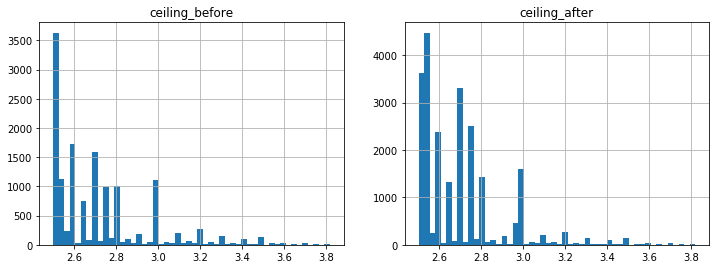

In [31]:
# переменная для тестовых данных
test_data = outliers_filtered_data('ceiling_height').copy()

# переменная для сравнения данных до преобразования (данные с фильтром выбросов)
ceiling_before = outliers_filtered_data('ceiling_height').copy()

# цикл для замена NaN в стобцах на медиану из группы по floors_total
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for index, values in outliers_filtered_data('ceiling_height').groupby('floors_total')['ceiling_height']:
        test_data.loc[test_data['floors_total'] == index, 'ceiling_height'] = \
        test_data.loc[test_data['floors_total'] == index, 'ceiling_height'].fillna(values.median())

# сколько осталось пропусков; удаление при необходимости
print('Осталось {} пропусков в'.format(test_data['ceiling_height'].isna().sum()), 'ceiling_height')

# вывод гистаграмм для сравнения данных до и после (данные без выбросов)
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
ceiling_before['ceiling_height'].hist(ax=axs[0, 0], bins=50).set_title('ceiling_before')
test_data['ceiling_height'].hist(ax=axs[0, 1], bins=50).set_title('ceiling_after')
axs.flat[-1].set_visible(False)
axs.flat[-2].set_visible(False)
plt.show;

Судя по гистограммам, распределение данных заметно меняется, это может исказить данные. Оставлю пропуски без изменений.

С *kitchen_area* и *living_area* задача легче: сумма жилой площади и площади кухни как раз составляет почти полную площадь квартиры. Т.к. в *total_area* пропусков нет, то можно вычислить средний коэффициент, который отражает ту долю от общего размера квартиры, который занимает искомая площадь, и подставить на место пропуска стоящее в той же строчке значение общей площади, умноженное на коэффициент.

Осталось 0 пропусков в kitchen_area
Осталось 0 пропусков в living_area



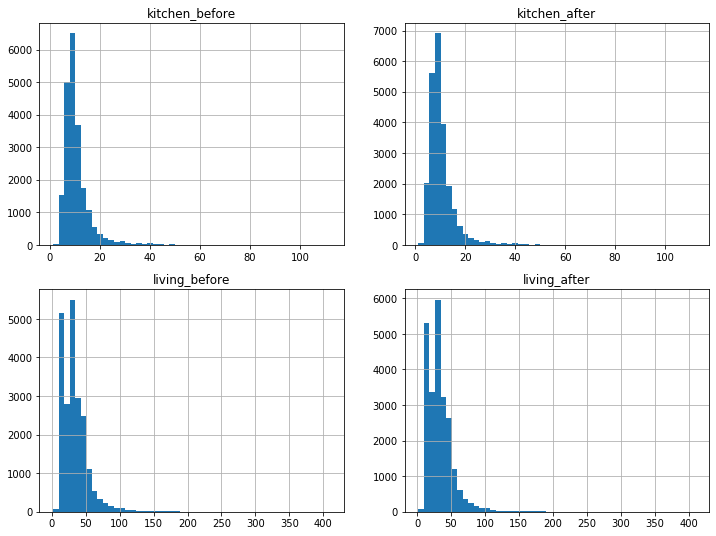

In [32]:
kitchen_before = real_estate_data['kitchen_area'].copy()
living_before = real_estate_data['living_area'].copy()

for column in ['kitchen_area', 'living_area']:

    ratio = (outliers_filtered_data(column)[column].median() \
     / outliers_filtered_data(column)['total_area'].median()).mean()
    
    real_estate_data.loc[real_estate_data[column].isna(), column] = \
    real_estate_data.loc[real_estate_data[column].isna(), 'total_area'] * ratio

    print('Осталось {} пропусков в'.format(real_estate_data[column].isna().sum()), column)
    print()


fig, axs = plt.subplots(2, 2, figsize=(12, 9))
kitchen_before.hist(ax=axs[0, 0], bins=50).set_title('kitchen_before')
real_estate_data['kitchen_area'].hist(ax=axs[0, 1], bins=50).set_title('kitchen_after')
living_before.hist(ax=axs[1, 0], bins=50).set_title('living_before')
real_estate_data['living_area'].hist(ax=axs[1, 1], bins=50).set_title('living_after');

Гистаграммы показывают, что распределение данных не нарушилось.

Теперь к геоданным. Больше всего пропусков в данных о ближайшем парке и водоеме, их больше половины. В связанных с ними данных о количестве парков и водоемов в радиусе 3 км оказалось одинаковое количество пропусков, это не случайно. Можно было бы заполнить данные о ближайшем парке/водоеме на основе существующих данных в *around3000*, но без выбросов во всех них стоит логически возможный ноль — т.е. нет ни одного парка/водоема в пределах 3 км: 

In [33]:
print('Нулей и пропусков в parks_around3000:', 
      rich_info(real_estate_data).loc['parks_around3000', 'nans'] + \
      rich_info(real_estate_data).loc['parks_around3000', 'zeros'])
print('Пропусков в parks_nearest:', 
      rich_info(real_estate_data).loc['parks_nearest', 'nans'])
print()
print('Нулей и пропусков в ponds_around3000:', 
      rich_info(real_estate_data).loc['ponds_around3000', 'nans'] + \
      rich_info(real_estate_data).loc['ponds_around3000', 'zeros'])
print('Пропусков в ponds_nearest:', 
      rich_info(real_estate_data).loc['ponds_nearest', 'nans'])

Нулей и пропусков в parks_around3000: 15590
Пропусков в parks_nearest: 15586

Нулей и пропусков в ponds_around3000: 14565
Пропусков в ponds_nearest: 14565


In [34]:
# число возможных замен пропусков в расстоянии до ближайших парков и водоемов, 
# где в данных о 3-х км радиусе стоят нули
print('Парков дальше 3 км:', len(real_estate_data.query('parks_nearest > 3000')))
print('Водоемов дальше 3 км:', len(real_estate_data.query('ponds_nearest > 3000')))

Парков дальше 3 км: 4
Водоемов дальше 3 км: 0


Есть точное расстояние только до 4-х парках дальше 3 км, и ни одного водоема в этом радиусе. Эти данные не помогут заполнить пропуски в *parks_nearest* и *ponds_nearest*.

Если посмотреть пересекающиеся пропуски в геоданных, получится следующее:

In [35]:
# переменная с полностью пропущенными геоданными
no_coords = (real_estate_data
 .query('airports_nearest.isna() and \
 city_centers_nearest.isna() and \
 parks_around3000.isna() and \
 parks_nearest.isna() and \
 ponds_around3000.isna() and \
 ponds_nearest.isna()')
)
print('Полностью отсутствующих геоданных:', len(no_coords))
print('Процент от общих данных: {:.2%}'.format((len(no_coords) / len(real_estate_data))))
print()
print('Пропусков только в parks_around3000:', len(real_estate_data.query('parks_around3000.isna()')))
print('Пропусков только в ponds_around3000:', len(real_estate_data.query('ponds_around3000.isna()')))

Полностью отсутствующих геоданных: 5510
Процент от общих данных: 23.30%

Пропусков только в parks_around3000: 5510
Пропусков только в ponds_around3000: 5510


Во-первых, полностью пропущенных геоданных — более 23% процентов, почти четверть. Во-вторых, на это количество как раз приходится одинаковая сумма пропусков в парках/водоемах в радиусе 3 км. Тем не менее, геоданные должны быть связаны с названием населенного пункта, и по ним можно частично восстановить пропуски. Посмотрю, какие населенные пункты встречаются в полностью пропущенных геоданных и какую долю они занимают от общего количества в этих локациях:

In [36]:
# список локаций с полностью пропущенными геоданными (данные с очищенными локациями)
(real_estate_data['locality_clear'].value_counts().head(25).to_frame(name='all')
 .join(no_coords['locality_clear'].value_counts().head(15).rename('no_coords'))
 .dropna().astype(int))

,all,no_coords
Мурино,590,588
Кудрово,472,472
Всеволожск,398,398
Гатчина,307,307
Выборг,237,237
Новое Девяткино,144,144
Сертолово,142,142
Кириши,125,125
Бугры,114,114
Сланцы,112,112


Кроме двух наблюдений в Мурино, в локациях с пропусками геоданные полностью отсутствуют. Возможно, при сборе данных в этих локациях был какой-то сбой; частично сюда попали локации, для которых были скрытые дубликаты — как выяснилось ранее, это не обязательно происходит по ошибке, а связано с изменившимся статусом населенного пункта за годы наблюдений, и это могло как-то повлиять на сбор геоданных. В любом случае, 5467 значений в 6 столбцах никак не получится восстановить.

Проверю итог предобработки и повторно изменю некорректные типы данных для столбцов, очищенных от пропусков:

In [37]:
real_estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_exposition_day        0
rooms                       0
ceiling_height           9160
floors_total                0
living_area                 0
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
locality_clear              0
dtype: int64

In [38]:
for column in ['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    real_estate_data.loc[real_estate_data[column].notna(), column] = \
    real_estate_data.loc[real_estate_data[column].notna(), column].astype('int64')

In [39]:
real_estate_data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_exposition_day    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
is_studio                         bool
is_open_plan                      bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
locality_clear                  object
dtype: object

В итоге, достоверной замены не нашлось для столбцов с геоданными, высотой потолков и длительностью размещения объявления. Типы данных переведены в корректный вид.

<a id='207'></a>
### Дубликаты

In [40]:
real_estate_data[real_estate_data.duplicated()==True]

,total_images,last_price,total_area,first_exposition_day,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_clear


Полных дубликатов в таблице нет. Посмотрю итоги предобработки в таблице с информацией:

In [41]:
rich_info(real_estate_data)

,dtypes,nans,zeros,count,mean,std,min,25%,50%,75%,max,col_desc
total_images,int64,0,1058,23650.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00,число фотографий квартиры в объявлении
last_price,int64,0,0,23650.00,6541126.90,10896399.18,12190.00,3400000.00,4650000.00,6799000.00,763000000.00,цена на момент снятия с публикации
total_area,float64,0,0,23650.00,60.33,35.66,12.00,40.00,52.00,69.70,900.00,площадь квартиры в квадратных метрах (м²)
first_exposition_day,datetime64[ns],0,0,nan,nan,nan,nan,nan,nan,nan,nan,дата публикации
rooms,int64,0,0,23650.00,2.08,1.07,1.00,1.00,2.00,3.00,19.00,число комнат
ceiling_height,float64,9160,0,14490.00,2.77,1.26,1.00,2.52,2.65,2.80,100.00,высота потолков (м)
floors_total,int64,0,0,23650.00,10.68,6.60,1.00,5.00,9.00,16.00,60.00,всего этажей в доме
living_area,float64,0,0,23650.00,34.61,22.39,2.00,19.00,30.00,42.12,409.70,жилая площадь в квадратных метрах (м²)
floor,int64,0,0,23650.00,5.89,4.88,1.00,2.00,4.00,8.00,33.00,этаж
is_apartment,bool,0,23600,nan,nan,nan,nan,nan,nan,nan,nan,апартаменты (булев тип)


<a id='208'></a>
### Выводы из предобработки данных

1. Данные соответствуют описанию.
1. Полных дубликатов. Найдены и обработаны скрытые дубликаты в *locality_name*.
1. Некорректные типы данных изменены на правильные.
1. Нелогичные нули и пропуски обработаны, где это возможно; для каждого столбца приведено возможное объяснение пропускам. Выделен список локаций, для которых полностью пропущены геоданные — пропуски в них пришлось оставить, т.к. они занимают почти четверть от всей таблицы.
1. Также определено количество выбросов в каждом столбце с числовыми данными.

В таком виде данные можно использовать для анализа данных.

<a id='part_3'></a>
## Шаг 3. Подсчет дополнительных параметров

<a id='301'></a>
### Цена квадратного метра

In [42]:
real_estate_data['sqm_price'] = real_estate_data['last_price'] / real_estate_data['total_area']
real_estate_data['sqm_price'].head(10)

0   120370.37
1    82920.79
2    92785.71
3   408176.10
4   100000.00
5    95065.79
6    99195.71
7   110544.69
8    87454.76
9    88524.59
Name: sqm_price, dtype: float64

<a id='302'></a>
### День недели, месяц и год публикации объявления

In [43]:
real_estate_data['first_exposition_weekday'] = real_estate_data['first_exposition_day'].dt.weekday
real_estate_data['first_exposition_month'] = real_estate_data['first_exposition_day'].dt.month
real_estate_data['first_exposition_year'] = real_estate_data['first_exposition_day'].dt.year
real_estate_data[['first_exposition_weekday', 'first_exposition_month', 'first_exposition_year']].head(10)

,first_exposition_weekday,first_exposition_month,first_exposition_year
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018
5,0,9,2018
6,3,11,2017
7,3,4,2019
8,2,5,2018
9,6,2,2017


<a id='303'></a>
### Этаж квартиры

In [44]:
def floor_type(row: 'df') -> 'string':
    '''
    Функция принимает строку из датафрейма;
    делит этажи на категории "первый", "последний", "другой";
    возвращает название категории
    '''
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == row['floors_total']:
        return 'последний'
    else:
        return 'другой'


real_estate_data['floor_type'] = real_estate_data.apply(floor_type, axis=1)
real_estate_data['floor_type'].value_counts()

другой       17408
последний     3330
первый        2912
Name: floor_type, dtype: int64

<a id='304'></a>
### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [45]:
real_estate_data['living_ratio'] = real_estate_data['living_area'] / real_estate_data['total_area']
real_estate_data['kitchen_ratio'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']
real_estate_data[['living_ratio', 'kitchen_ratio']].head(10)

,living_ratio,kitchen_ratio
0,0.47,0.23
1,0.46,0.27
2,0.61,0.15
3,0.58,0.17
4,0.32,0.41
5,0.47,0.30
6,0.28,0.39
7,0.58,0.26
8,0.47,0.27
9,0.71,0.11


<a id='part_4'></a>
## Шаг 4. Исследовательский анализ данных

<a id='401'></a>
### Обработка редких и выбивающихся значений

Количество выбросов и примерную границу для их фильтра ранее уже удалось определить. Ещё раз обращусь к этим данным, выделю данные без выбросов в отдельный датафрейм и сравню на гистограммах разницу между «сырыми» и отфильтрованными данными.

In [46]:
# вывод описательной статистики с расширенным набором квантилей для оценки разброса данных
(real_estate_data
 [real_estate_data.select_dtypes(include=['int64', 'float64']).columns]
 .describe(percentiles=[.01, .95, .96, .97, .98, .99]))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,first_exposition_weekday,first_exposition_month,first_exposition_year,living_ratio,kitchen_ratio
count,23650.00,23650.00,23650.00,23650.00,14490.00,23650.00,23650.00,23650.00,23650.00,23650.00,18116.00,18139.00,18140.00,8064.00,18140.00,9085.00,20470.00,23650.00,23650.00,23650.00,23650.00,23650.00,23650.00
mean,9.86,6541126.90,60.33,2.08,2.77,10.68,34.61,5.89,10.50,0.59,28803.23,14197.86,0.61,490.83,0.77,518.06,180.75,99432.25,2.57,6.40,2017.37,0.57,0.19
std,5.68,10896399.18,35.66,1.07,1.26,6.60,22.39,4.88,6.04,0.96,12637.31,8606.83,0.80,342.55,0.94,277.84,219.78,50337.94,1.79,3.49,1.04,0.10,0.07
min,0.00,12190.00,12.00,1.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,111.83,0.00,1.00,2014.00,0.02,0.03
1%,0.00,1000000.00,25.17,1.00,2.50,2.00,13.00,1.00,4.38,0.00,9412.15,1327.38,0.00,24.00,0.00,35.00,4.00,23200.90,0.00,1.00,2015.00,0.31,0.08
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26756.50,13105.00,0.00,454.50,1.00,502.00,95.00,95000.00,3.00,6.00,2017.00,0.58,0.17
95%,20.00,15300000.00,116.00,4.00,3.30,25.00,69.55,16.00,20.00,2.00,51340.00,31651.10,2.00,968.00,3.00,977.00,647.55,160727.23,6.00,12.00,2019.00,0.72,0.31
96%,20.00,17000000.00,125.00,4.00,3.35,25.00,75.00,17.00,22.00,2.00,52108.00,32799.32,2.00,1079.00,3.00,998.00,710.24,169594.02,6.00,12.00,2019.00,0.73,0.32
97%,20.00,20000000.00,139.50,4.00,3.47,25.00,82.40,19.00,24.30,2.00,53162.00,34147.86,3.00,1264.00,3.00,1028.44,789.93,182745.16,6.00,12.00,2019.00,0.74,0.34
98%,20.00,25000000.00,159.00,5.00,3.54,25.00,95.00,21.00,28.10,4.00,54337.00,35511.00,3.00,1514.00,3.00,1087.00,900.00,206212.11,6.00,12.00,2019.00,0.76,0.36


В таблице видно огромную разницу между минимальными/максимальными значениями и 1-м/99-м перцентилями.

In [47]:
# подсчет количества выбросов для каждого столбца (кроме новых)
for column in (real_estate_data.select_dtypes(include=['int64', 'float64']).columns
               .drop(['sqm_price', 
                      'living_ratio', 
                      'kitchen_ratio', 
                      'first_exposition_weekday', 
                      'first_exposition_month',
                      'first_exposition_year'])):
    print('{:.2%} выбросов в'.format(
        (len(real_estate_data[column]) - len(outliers_filtered_data(column)[column])) / len(real_estate_data)), 
          column)

0.32% выбросов в total_images
1.95% выбросов в last_price
2.00% выбросов в total_area
0.82% выбросов в rooms
0.92% выбросов в ceiling_height
1.03% выбросов в floors_total
1.91% выбросов в living_area
0.63% выбросов в floor
1.90% выбросов в kitchen_area
0.00% выбросов в balcony
1.54% выбросов в airports_nearest
1.54% выбросов в city_centers_nearest
0.00% выбросов в parks_around3000
0.66% выбросов в parks_nearest
0.00% выбросов в ponds_around3000
0.72% выбросов в ponds_nearest
1.55% выбросов в days_exposition


In [48]:
# создание отдельного датафрейма с данными без выбросов
no_outliers_data = real_estate_data.copy()

# цикл удаляет из скопированного датафрейма строки по индексам, 
# которые лежат вне диапазона ± 1.5 межквартильных размахов от 1 и 3 квартиля,
# но в датафрейм включены оставшиеся пропуски
for column in (real_estate_data.select_dtypes(include=['int64', 'float64']).columns
               .drop(['sqm_price', 
                      'living_ratio', 
                      'kitchen_ratio', 
                      'first_exposition_weekday', 
                      'first_exposition_month',
                      'first_exposition_year'])):
    no_outliers_data = (no_outliers_data
    .drop(index=no_outliers_data
    [~no_outliers_data.index
    .isin(outliers_filtered_data(column).index)].index))

# подсчет процента удаленных данных
print('Процент данных с выбросами: {:.2%}'
.format((len(real_estate_data) - len(no_outliers_data)) / len(real_estate_data)))

Процент данных с выбросами: 12.72%


In [79]:
len(no_outliers_data) / len(original_data)

0.8709650196210811

In [49]:
# вывод описательных статистик для проверки
(no_outliers_data
 [real_estate_data.select_dtypes(include=['int64', 'float64']).columns]
 .describe(percentiles=[.01, .95, .96, .97, .98, .99]))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,first_exposition_weekday,first_exposition_month,first_exposition_year,living_ratio,kitchen_ratio
count,20641.00,20641.00,20641.00,20641.00,12713.00,20641.00,20641.00,20641.00,20641.00,20641.00,15723.00,15743.00,15744.00,6709.00,15744.00,7573.00,17870.00,20641.00,20641.00,20641.00,20641.00,20641.00,20641.00
mean,9.86,5641819.74,57.24,2.03,2.70,10.60,32.91,5.76,9.98,0.60,28555.12,14008.18,0.57,475.34,0.72,530.01,169.13,96216.68,2.57,6.39,2017.40,0.57,0.18
std,5.55,3848085.12,23.74,0.94,0.23,6.28,15.68,4.58,4.23,0.96,12009.28,7359.35,0.77,275.18,0.90,265.29,192.17,35269.70,1.79,3.49,1.01,0.10,0.06
min,0.00,1000000.00,25.20,1.00,2.50,2.00,13.00,1.00,4.40,0.00,9413.00,1328.00,0.00,24.00,0.00,35.00,4.00,10507.25,0.00,1.00,2014.00,0.18,0.05
1%,0.00,1290000.00,28.80,1.00,2.50,2.00,14.10,1.00,5.00,0.00,10129.00,2184.84,0.00,43.00,0.00,55.72,5.00,28723.14,0.00,1.00,2015.00,0.34,0.08
50%,10.00,4600000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26944.00,13181.00,0.00,456.00,0.00,521.00,94.00,94285.71,3.00,6.00,2017.00,0.58,0.17
95%,20.00,12850000.00,103.00,4.00,3.20,24.00,62.40,16.00,18.00,2.00,50786.10,30904.90,2.00,883.20,3.00,963.00,591.55,152663.62,6.00,12.00,2019.00,0.72,0.30
96%,20.00,13900000.00,108.10,4.00,3.20,25.00,65.64,16.00,19.00,2.00,51333.00,31413.32,2.00,943.00,3.00,982.00,643.00,159102.19,6.00,12.00,2019.00,0.73,0.31
97%,20.00,15184000.00,115.00,4.00,3.30,25.00,70.00,17.00,20.00,2.00,51819.50,32539.00,2.00,1052.04,3.00,998.84,707.00,167865.89,6.00,12.00,2019.00,0.74,0.32
98%,20.00,17800000.00,125.00,4.00,3.40,25.00,76.40,19.00,23.00,4.00,53148.00,33783.00,3.00,1225.92,3.00,1034.00,788.00,180258.74,6.00,12.00,2019.00,0.75,0.34


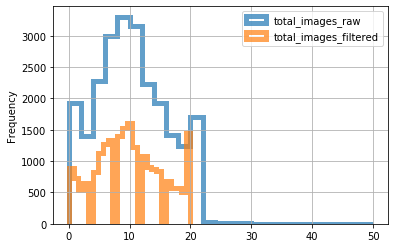

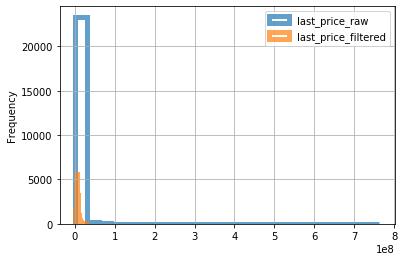

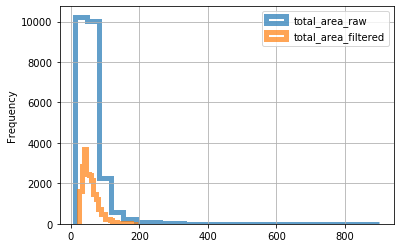

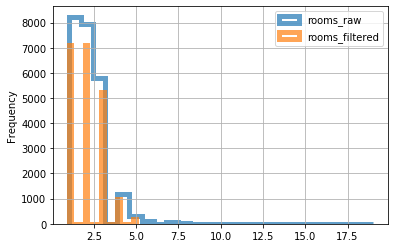

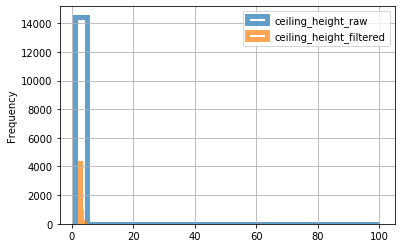

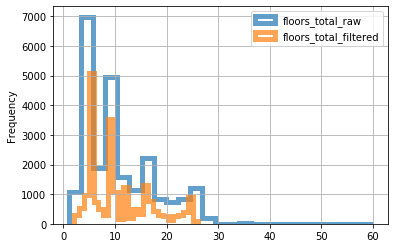

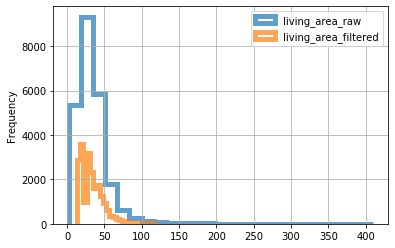

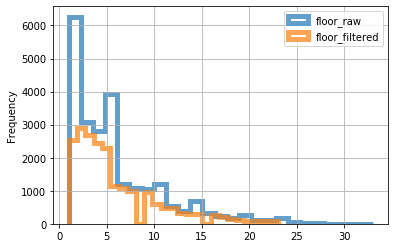

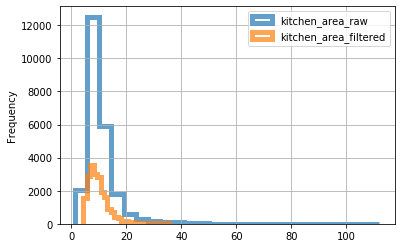

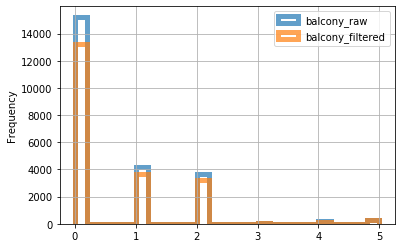

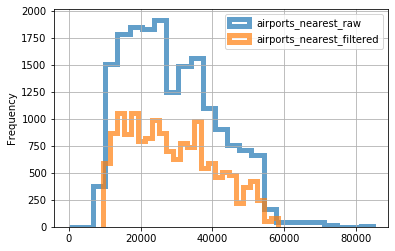

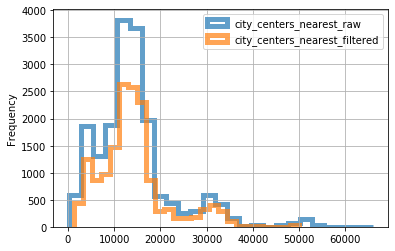

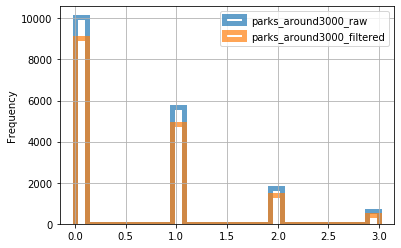

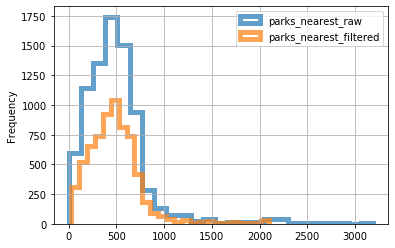

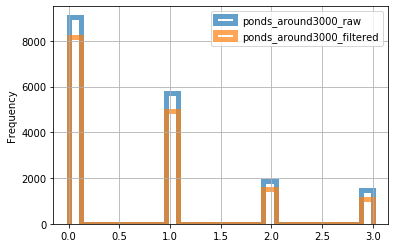

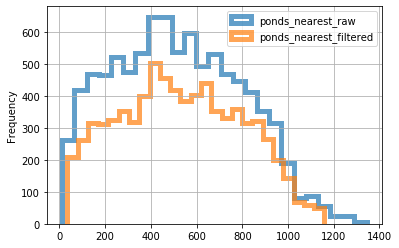

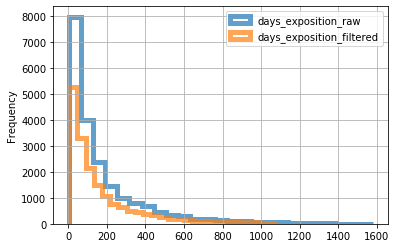

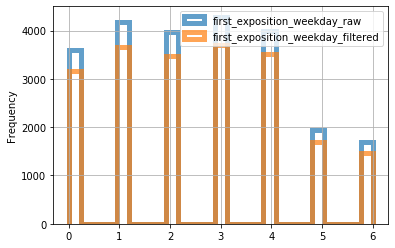

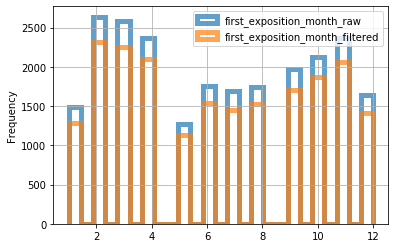

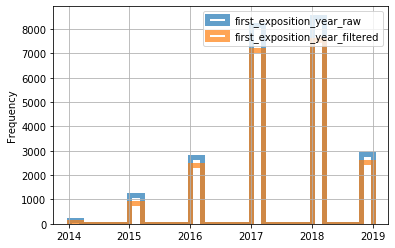

In [50]:
# цикл для вывода двух наложенных друг на друга гистаграмм с сырыми и отфильрованными данными
# для столбцов из оригинального датафрейма
for column in (real_estate_data
               .select_dtypes(include=['float64', 'int64']).columns
               .drop(['sqm_price', 'living_ratio', 'kitchen_ratio'])):
    real_estate_stat = (real_estate_data
                        .pivot_table(index=real_estate_data.index, values=column, aggfunc="median"))
    no_outliers_stat = (no_outliers_data
                        .pivot_table(index=no_outliers_data.index, values=column, aggfunc="median"))
    
    # сохранение параметров гистограммы для сырых данных
    ax = real_estate_stat.plot(kind='hist', 
                               y=column, 
                               histtype='step', 
                               bins=25, 
                               linewidth=5, 
                               alpha=0.7, 
                               label=column+'_raw')
    
    # вывод объединенных гистаграмм для сырых и отфильтрованных данных
    no_outliers_stat.plot(kind='hist', 
                          y=column, 
                          histtype='step', 
                          bins=25, 
                          linewidth=5, 
                          alpha=0.7, 
                          label=column+'_filtered', 
                          ax=ax, 
                          grid=True, 
                          legend=True)

На этих гистограммах можно видеть, что большинство данных после очистки от выбросов преимущественно сохранили характер распределения данных. Отдельно рассмотрю столбцы, где характер распределения визуально изменился:

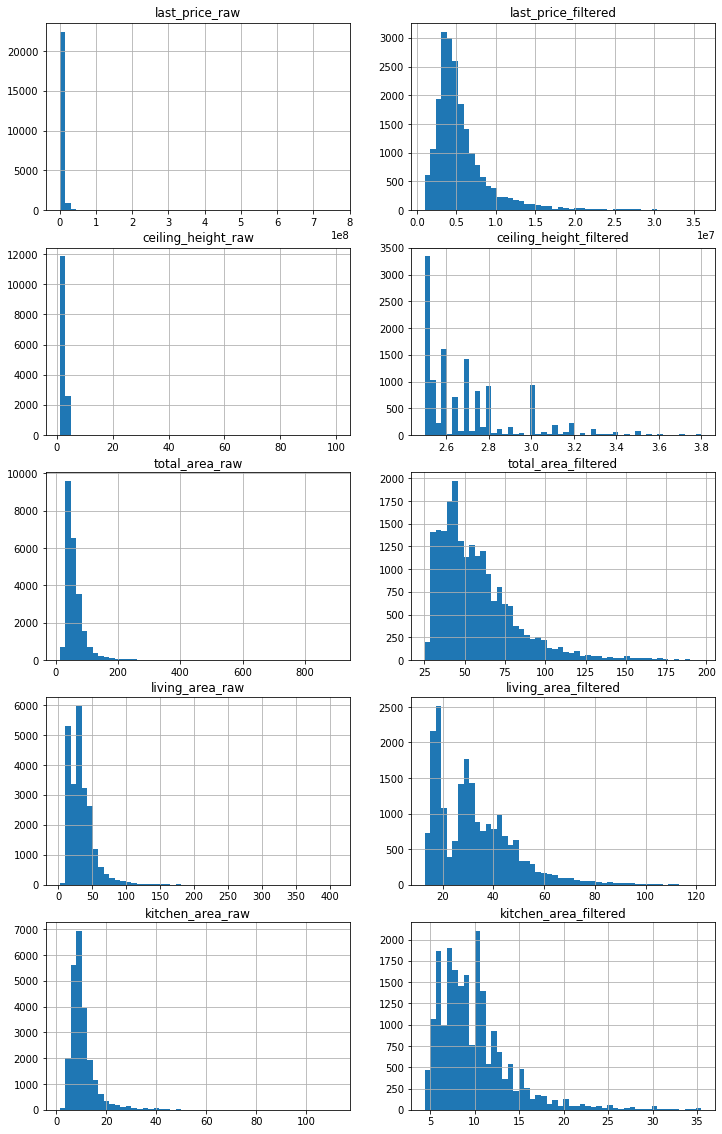

In [51]:
fig, axs = plt.subplots(5, 2, figsize=(12, 20))
i = 0
for column in ['last_price', 'ceiling_height',  'total_area', 'living_area', 'kitchen_area']:
    real_estate_data[column].hist(ax=axs[i, 0], bins=50).set_title(column+'_raw')
    no_outliers_data[column].hist(ax=axs[i, 1], bins=50).set_title(column+'_filtered')
    i += 1

Слева приведены распределения данных из оригинальной таблицы, а справа — из отфильтрованной. Без экстремальных значений более ясно виден характер распределения данных, по ним можно делать дальнейшие выводы.

Суммарно пришлось отфильтровать более 12% данных, однако по описательным статистикам видно, что разброс данных, разница между «крайними» квантилями и минимальными/максимальными значениями заметно сократился; значит, можно более точно судить о характеристиках типичных значений. Также удаление выбросов позволило более точно оценить распределение данных: с выбросами кажется, что большинство столбцов обладают распределением Пуассона, а на деле это не так.

<a id='402'></a>
### Изучение параметров: площадь, цена, число комнат, высота потолков

In [52]:
# описательные статистики для изучаемых столбцов
no_outliers_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,20641.00,20641.00,20641.00,12713.00
mean,57.24,5641819.74,2.03,2.70
std,23.74,3848085.12,0.94,0.23
min,25.20,1000000.00,1.00,2.50
25%,40.30,3450000.00,1.00,2.50
50%,52.00,4600000.00,2.00,2.65
75%,68.00,6500000.00,3.00,2.80
max,197.00,36000000.00,5.00,3.80


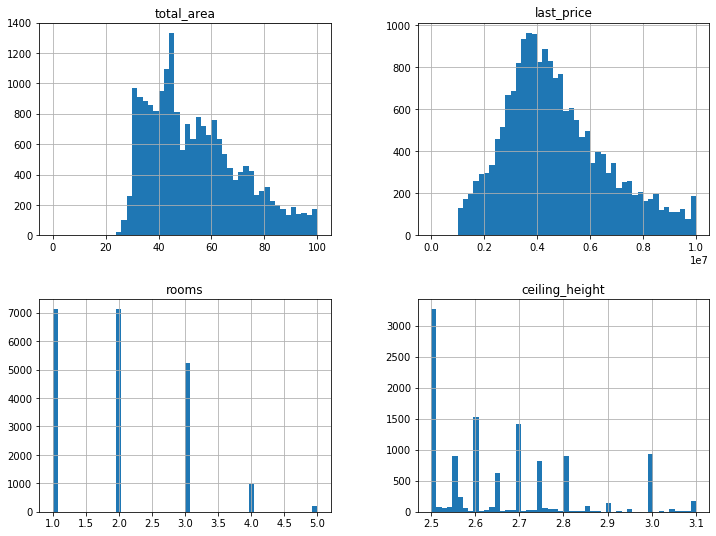

In [53]:
# гистограммы для изучаемых столбцов
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
no_outliers_data.hist(column='total_area', ax=axs[0, 0], range=(0, 100), bins=50)
no_outliers_data.hist(column='last_price', ax=axs[0, 1], range=(0, 10000000), bins=50)
no_outliers_data.hist(column='rooms', ax=axs[1, 0], bins=50)
no_outliers_data.hist(column='ceiling_height', ax=axs[1, 1], range=(2.5, 3.1), bins=50);

Из данных видно, что в основном продают 1-, 2- и 3-комнатные квартиры с потолками высотой от 2,5 до 2,8 метров (а также заметна группа с потолками в 3 метра), площадью от 38 до 80 м² и стоимостью от 2 до 6 млн. Причем видно, что большинство цен лежат в диапазоне от 3,2 до 5,6 млн, а верхняя граница площади для большинства квартир ограничена даже 60 м².

Посмотрю также боксплоты для дополнительной оценки разброса:

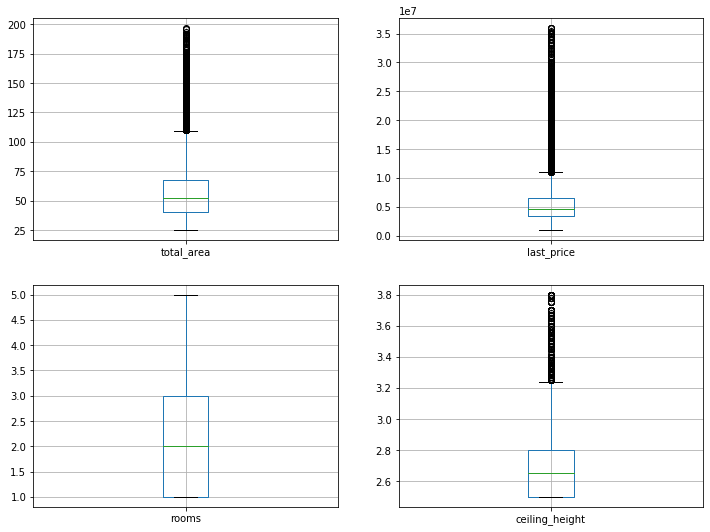

In [54]:
# боксплоты для изучаемых столбцов
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
no_outliers_data.boxplot(column='total_area', ax=axs[0, 0])
no_outliers_data.boxplot(column='last_price', ax=axs[0, 1])
no_outliers_data.boxplot(column='rooms', ax=axs[1, 0])
no_outliers_data.boxplot(column='ceiling_height', ax=axs[1, 1]);

По боксплотам можно видеть, что остается заметная группа высоких значений по изучаемым столбцам.

<a id='403'></a>
### Изучение времени продажи квартиры

count   20104.00
mean      171.67
std       194.41
min         4.00
25%        45.00
50%        95.00
75%       226.00
max      1069.00
Name: days_exposition, dtype: float64



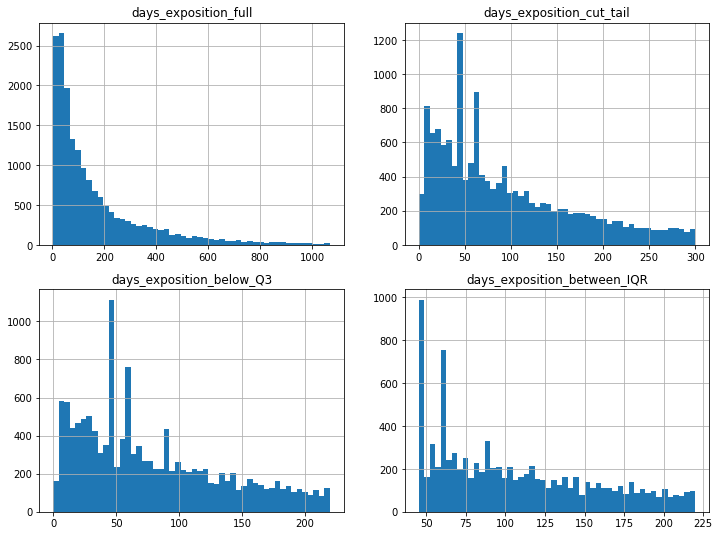

In [55]:
# вывод описательной статистики days_exposition
print(outliers_filtered_data('days_exposition')['days_exposition'].describe())
print()

# вывод гистограмм для оценки распределения days_exposition: 
# полностью, с сокращенным хвостом, 
# в пределе 75 перцентиля и в пределах межквартильного размаха
q1 = no_outliers_data['days_exposition'].quantile(.25)
q3 = no_outliers_data['days_exposition'].quantile(.75)
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
no_outliers_data['days_exposition'].hist(ax=axs[0, 0], bins=50).set_title('days_exposition_full')
no_outliers_data['days_exposition'].hist(range=(0, 300), ax=axs[0, 1], bins=50).set_title('days_exposition_cut_tail')
no_outliers_data['days_exposition'].hist(range=(0, q3), ax=axs[1, 0], bins=50).set_title('days_exposition_below_Q3')
no_outliers_data['days_exposition'].hist(range=(q1, q3), ax=axs[1, 1], bins=50).set_title('days_exposition_between_IQR')
plt.show;

В основном квартиры продают в течение 7 месяцев, для типичной продажи хватает чуть больше трех месяцев. При этом на всех гистограммах заметны два пика с самыми частыми сроками размещения объявлений. Выведу список уникальных значений для их изучения:

In [56]:
no_outliers_data['days_exposition'].value_counts().head(20).sort_index()

4.00     164
5.00     134
6.00     114
7.00     211
8.00     123
9.00     122
10.00    119
11.00    122
13.00    117
14.00    127
15.00    114
18.00    115
19.00    113
20.00    128
28.00    113
30.00    190
44.00    125
45.00    762
60.00    491
90.00    156
Name: days_exposition, dtype: int64

Самая частая длительность размещения объявлений — 44-45, 60 и 90 дней. Остальные самые частые длительности распределены примерно равными долями, но много значений собраны в пределах 30 дней. 

Сначала подробнее изучу пиковые значения в пределах нормы — как в этих группах распределены данные о площади, цене, количестве комнат и высоте потолков:

In [57]:
# данные о площади, цене, количестве комнат и высоте потолков для пиков в пределах нормы
stats = no_outliers_data['days_exposition'].describe().to_frame()
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    stats = (stats
    .join(no_outliers_data.query("days_exposition == 44 or days_exposition == 45")
          [column].describe().rename(column+'_45'))
    .join(no_outliers_data.query("days_exposition == 60")
          [column].describe().rename(column+'_60'))
    .join(no_outliers_data.query("days_exposition == 90")
          [column].describe().rename(column+'_90')))
stats.drop('days_exposition', axis=1)

,total_area_45,total_area_60,total_area_90,last_price_45,last_price_60,last_price_90,rooms_45,rooms_60,rooms_90,ceiling_height_45,ceiling_height_60,ceiling_height_90
count,887.00,491.00,156.00,887.00,491.00,156.00,887.00,491.00,156.00,406.00,251.00,85.00
mean,46.92,60.69,81.29,3418373.21,6028556.11,10787581.24,1.74,2.18,2.56,2.62,2.72,2.80
std,14.54,16.72,29.89,1655210.88,1656930.30,5520065.26,0.82,0.85,0.94,0.17,0.21,0.25
min,25.90,25.36,31.00,1000000.00,1200000.00,1580000.00,1.00,1.00,1.00,2.50,2.50,2.50
25%,36.00,48.95,57.90,2500000.00,4900000.00,5417500.00,1.00,2.00,2.00,2.50,2.60,2.60
50%,44.00,59.70,82.95,3350000.00,5752000.00,11253682.00,2.00,2.00,3.00,2.60,2.70,2.75
75%,54.00,72.00,98.15,4000000.00,6900000.00,13500000.00,2.00,3.00,3.00,2.70,2.80,3.00
max,165.00,132.00,188.00,24412900.00,13900000.00,35500000.00,5.00,5.00,5.00,3.70,3.60,3.55


Похоже, что в группу 60-дневных попали более премиальные объявления: в основном это квартиры с большей площадью, немного большей высотой потолков, в них больше 3-комнатных, они дороже. Медиана 44-45-дневных ближе к нижнему квартилю общего распределения *last_price*, а медиана 60-дневных — к верхнему. Та же тенденция для 90-дневных — у них все показатели выше. В этом смысле кажется логичным, что более дорогие квартиры дольше продаются. 

Есть и другое возможное объяснение большему количеству 60- и 90-дневных объявлений — в том числе среди наиболее частных нет 59 или 61 дня. Это связано с оплатой за размещение на сайте, которая вносится на каждые 30 дней. На самом деле, из данных мы не знаем достоверно точно, почему объявление сняли; продажа кажется только самой вероятно чертой. В группу 60-дневных, скорее всего, также входят те объявления, которые продались между сроком 31 и 60 дней, но которые не сняли после продажи — соответственно, эти объявления деактивировались автоматически после окончания второго оплаченного срока размещения. Так же и для группы 90-дневных с объявлениями, которые продавались от 61 до 90 дней.

Рассмотрю теперь группу быстрых и долгих продаж:

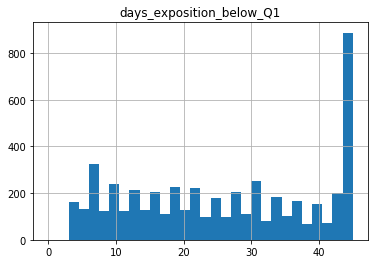

In [58]:
# гистограмма для days_exposition до 1-го квартиля
no_outliers_data['days_exposition'].hist(range=(0, q1), bins=30).set_title('days_exposition_below_Q1');

In [59]:
# данные о площади, цене, количестве комнат и высоте потолков для длительности менее 44 дней
exposition_lower = no_outliers_data['days_exposition'].quantile(.25)
(no_outliers_data.query("days_exposition < @exposition_lower")
 [['days_exposition', 'total_area', 'last_price', 'rooms', 'ceiling_height']].describe())

,days_exposition,total_area,last_price,rooms,ceiling_height
count,4433.00,4433.00,4433.00,4433.00,2590.00
mean,22.26,52.27,5105883.47,1.87,2.67
std,12.01,19.96,3087679.18,0.88,0.20
min,4.00,25.20,1000000.00,1.00,2.50
25%,11.00,37.90,3400000.00,1.00,2.50
50%,21.00,46.60,4350000.00,2.00,2.60
75%,32.00,61.70,5900000.00,2.00,2.75
max,44.00,190.00,36000000.00,5.00,3.80


Если рассмотреть гистограмму для длительности до 44 дней включительно, то здесь данные распределены более равномерно. Есть пики на 7 и на 30 дней. В целом распределение данных о площади, цене, количестве комнат и высоте потолков в этой группе никак особенно не отличается от общего распределения данных в этих столбцах, не видно никаких аномалий.

Для 30 дней объяснение может быть схожим с 60 днями — сюда попали квартиры, которые были проданы в течение 30 дней, но объявления о которых забыли снять. А большее количество на 7 дней кажется странным, это вообще необычно быстро для продажи.

Рассмотрю также группу долгих и экстремально долгих продаж:

In [60]:
# данные о площади, цене, количестве комнат и высоте потолков для длительности более 221 дня и менее 434 дней
exposition_q3 = no_outliers_data['days_exposition'].quantile(.75)
exposition_upper = no_outliers_data['days_exposition'].quantile(.90)
(no_outliers_data.query("@exposition_q3 < days_exposition <= @exposition_upper")
 [['days_exposition', 'total_area', 'last_price', 'rooms', 'ceiling_height']].describe())

,days_exposition,total_area,last_price,rooms,ceiling_height
count,2675.00,2675.00,2675.00,2675.00,1646.00
mean,313.64,59.48,5732483.04,2.10,2.72
std,61.00,24.84,3893691.07,0.97,0.24
min,221.00,26.00,1000000.00,1.00,2.50
25%,261.00,41.50,3490000.00,1.00,2.55
50%,307.00,54.00,4630000.00,2.00,2.65
75%,365.00,71.66,6695000.00,3.00,2.80
max,433.00,193.20,31750000.00,5.00,3.80


In [61]:
# данные о площади, цене, количестве комнат и высоте потолков для длительности более 434 дней
exposition_extra = no_outliers_data['days_exposition'].quantile(.90)
(real_estate_data.query("days_exposition > @exposition_extra")
 [['days_exposition', 'total_area', 'last_price', 'rooms', 'ceiling_height']].describe())

,days_exposition,total_area,last_price,rooms,ceiling_height
count,2283.00,2283.00,2283.00,2283.00,1464.00
mean,688.65,69.21,8108757.15,2.29,2.82
std,232.39,42.65,11956300.39,1.21,0.74
min,434.00,18.00,490000.00,1.00,2.40
25%,505.00,42.48,3600000.00,1.00,2.55
50%,615.00,58.00,5160000.00,2.00,2.70
75%,812.50,81.60,8500000.00,3.00,3.00
max,1580.00,507.00,190870000.00,16.00,27.00


В группе между 221 и 896 днями данные соответствуют общим распределениям в столбцах, а в случае с экстремально долгими продажами заметно, что все параметры выше: квартиры в среднем более дорогие, с большей площадью, с более высокими потолками и большим количеством комнат. Конечно, это данные с выбросами, разброс значений здесь выше, чем в отфильтрованных данных, поэтому к таким выводам стоит относиться осторожнее, но тенденция кажется логичной — дорогие премиальные квартиры продаются гораздо дольше. Вероятно также, что в этой группе экстремально долгих продаж может быть больше новостроек.

В итоге о сроке продажи можно сказать следующее: нормальными можно считать продажи длительностью от 1 до 7 месяцев, при этом чаще всего успевают продавать квартиры в пределах от 1 до 3 месяцев. Наиболее частый срок — 45 дней. Соответственно, долгими можно считать продажи свыше 7 месяцев, а экстремально долгими — свыше 14 месяцев. Для более долгих объявлений можно проследить тенденцию, что это часто более дорогие квартиры с лучшими условиями, поэтому более длительный срок продажи кажется логичным. Быстрой можно считать продажу в течение месяца, при этом заметный пик пришелся на 7 дней — если за неделю пользователь успел продать квартиру, то это очень быстро. Я не нашел в распределении данных объяснения этому феномену.

Важно также заметить, что в *days_exposition* хранятся данные именно о длительности публикации на сайте, и продажа — наиболее логичная, но не единственная причина снятия объявления с публикации. Достоверно причину снятия узнать по этим данным нельзя. Поэтому в *days_exposition* наблюдаются пики на 30, 60 и 90 днях.

<a id='404'></a>
### Какие факторы больше всего влияют на стоимость квартиры? 

Зависимость цены от числовых данных — площади, числа комнат и удаленности от центра — можно проверить с помощью корреляционной матрицы:

In [62]:
(no_outliers_data.corr()
 .loc[['total_area', 'living_area', 'kitchen_area', 'rooms', 'city_centers_nearest']]
 ['last_price'])

total_area              0.77
living_area             0.66
kitchen_area            0.60
rooms                   0.46
city_centers_nearest   -0.35
Name: last_price, dtype: float64

Видно, что есть положительная линейная зависимость цены от общей площади квартиры; при этом на цену немного больше влияет жилая площадь квартиры, а не кухня. То есть, цена увеличивается с ростом площади. Так же происходит и с количеством комнат, многокомнатные квартиры дороже. Но в случае с *rooms* коэффициент корреляции ниже, чем с *total_area*, скорее всего потому, что в данных о комнатах меньшая вариативность, большинство квартир — 1-, 2- и 3-комнатные. Наконец, удаленность от центра имеет отрицательную зависимость (тоже невысокую) — это значит, что квартиры в центре более дорогие. Результаты выглядят логично.

Далее проверю взаимосвязь цены и этажности, для этого подойдет сводная таблица:

In [63]:
(no_outliers_data
 .pivot_table(index='floor_type', 
              values='last_price', 
              aggfunc=['mean', 'median'])
 .sort_values(by=('mean', 'last_price')))

,mean,median
,last_price,last_price
floor_type,,
первый,4528934.53,3950000
последний,5334202.30,4250000
другой,5883044.89,4800000


Распределение и медиан, и средних показывают одну тендецию — что квартиры на первых и последних этажах стоят в среднем дешевле, чем остальные этажи.

Наконец, посмотрю, как меняется цена со временем — по годам, месяцам и дням недели. Диаграмма рассеяния покажет колебания данных о цене по этим трем показателям, а графики покажут динамику цен во времени:

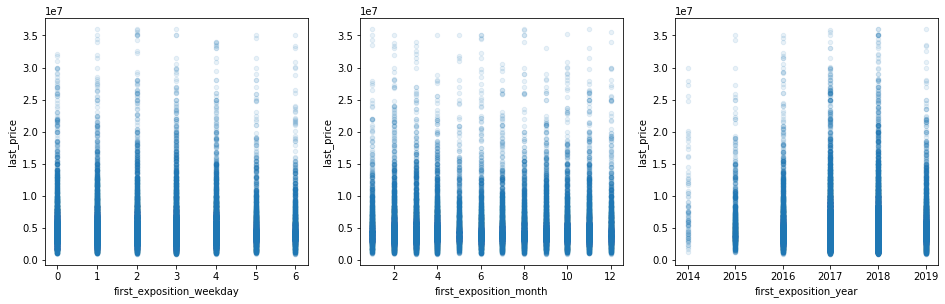

In [64]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
i = 0
for column in ['first_exposition_weekday', 'first_exposition_month', 'first_exposition_year']:
    no_outliers_data.plot(y='last_price', x=column, kind='scatter', alpha=0.1, ax=axs[0, i])
    i += 1
axs.flat[-1].set_visible(False)
axs.flat[-2].set_visible(False)
axs.flat[-3].set_visible(False)

По диаграммам рассеяния заметно, что разброс в ценах не очень сильно различается в пределах показателей времени; наиболее заметно, что разброс в ценах 2015 года меньше, в мае он также меньше.

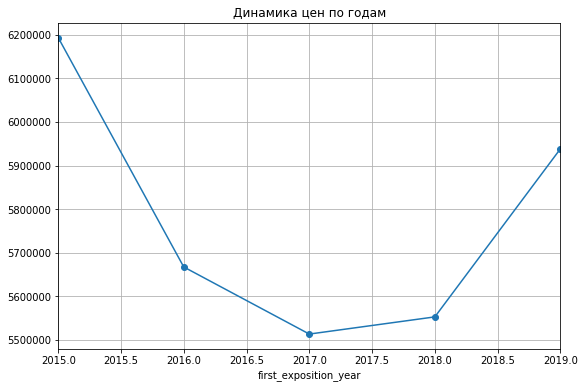

In [65]:
(no_outliers_data.query('first_exposition_year != 2014')
 .groupby('first_exposition_year')['last_price'].mean()
 .plot(figsize=(9, 6), grid=True, style='o-'))
plt.title('Динамика цен по годам')
plt.show()

На графике можно видеть, что в течение 2015 года цена падала с 6,2 млн до 5,7 млн, продолжила падать в 2016, в 2017 начала опять расти, а к 2019 за год средняя цена дошла почти до 6 млн — при том, что данные доступны за неполный 2019. 

Важно уточнить: в выборку за 2014 попали только два последних месяца, суммарно объявлений — 136, но они создаются сильное искажение. Поэтому я исключил из графика эти данные.

In [66]:
real_estate_data.query('first_exposition_year == 2014')['first_exposition_month'].value_counts()

12    116
11     20
Name: first_exposition_month, dtype: int64

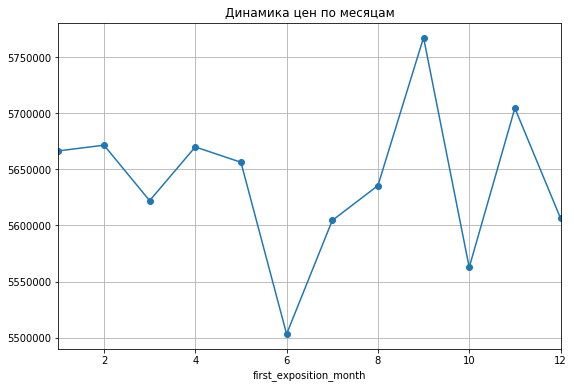

In [67]:
(no_outliers_data.groupby('first_exposition_month')['last_price'].mean()
 .plot(figsize=(9, 6), grid=True, style='o-'))
plt.title('Динамика цен по месяцам')
plt.show()

По месяцам динамика очень разная. Заметны провалы в стоимости в марте, июне, октябре и декабре; пиковые значения приходятся на сентябрь и ноябрь. В целом цена в течение года колеблется в пределах 250 тысяч.

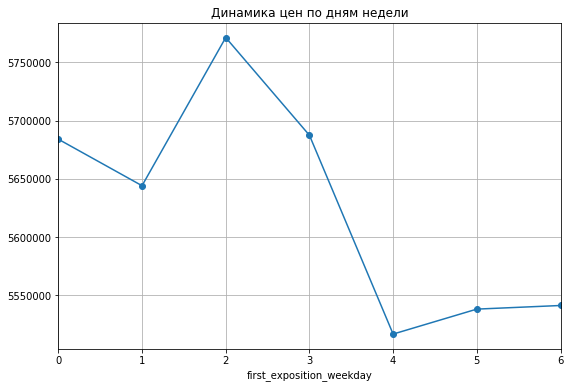

In [68]:
(no_outliers_data.groupby('first_exposition_weekday')['last_price'].mean()
 .plot(figsize=(9, 6), grid=True, style='o-'))
plt.title('Динамика цен по дням недели')
plt.show()

На квартиры, размещенные в первую половину недели, цена обычно выше — особенно в среду; размещенные в конце недели квартиры немного дешевле. В то же самое время разница в ценах не очень большая относительно двух других графиков, колеблется в пределах примерно 200 тысяч.

В итоге можно сказать, что цена увеличивается с ростом площади квартиры и количества комнат, уменьшается при удалении от центра города. За последний год цены в среднем выросли, но сэкономить поможет выбор квартиры на первом и последнем этаже и которую продают в конце недели в июне.

<a id='405'></a>
### 10 населённых пунктов с наибольшим числом объявлений

In [69]:
locality_top_10 = no_outliers_data['locality_clear'].value_counts().head(10).index.to_list()
(no_outliers_data
 .query('locality_clear == @locality_top_10')
 .pivot_table(index='locality_clear', 
              values='sqm_price', 
              aggfunc='mean')
 .sort_values(by=['sqm_price']))

,sqm_price
locality_clear,
Выборг,58472.55
Всеволожск,68695.58
Гатчина,68928.03
Колпино,75183.66
Шушары,77941.12
Мурино,84943.51
Парголово,91829.02
Кудрово,94663.22
Пушкин,102704.03


Наиболее высокая средняя цена квадратного метра — в 5-миллионном Санкт-Петербурге, а наиболее низкая (среди городов с большим количеством объявлений) — в 75-тысячном Выборге. Довольно логично, что в крупнейшем городе области, густонаселенном и культурно значимом Петербурге цены на квартиры будут наиболее высокими. Второе место занимает Пушкин (ранее знаменитое Царское Село) — важный туристический город. Идущие далее Кудрово и Парголово находятся в пригороде Санкт-Петербурга, этим можно объяснить близкие к столичным цены.

<a id='406'></a>
### Определение центральной области Санкт-Петербурга по средней цене

In [70]:
# столбец с расстоянием от центра в километрах, округление и проверка
no_outliers_data['city_centers_km'] = no_outliers_data['city_centers_nearest'] / 1000
no_outliers_data.loc[no_outliers_data['city_centers_km'].notna(), 'city_centers_km'] = \
no_outliers_data.loc[no_outliers_data['city_centers_km'].notna(), 'city_centers_km'].round()
no_outliers_data['city_centers_km'].head()

0   16.00
1   19.00
2   14.00
5     nan
7   12.00
Name: city_centers_km, dtype: float64

In [71]:
# распределение цен по удаленности от центра, без учета отсутствующих геоданных
(no_outliers_data.query('locality_clear == "Санкт-Петербург" and parks_around3000.notna()')
 .pivot_table(index='city_centers_km', 
              values='last_price'))

,last_price
city_centers_km,
1.00,11539062.50
2.00,10327008.97
3.00,9475931.23
4.00,10108280.21
5.00,10558977.17
6.00,9941956.26
7.00,9797263.67
8.00,8722284.71
9.00,6581371.12


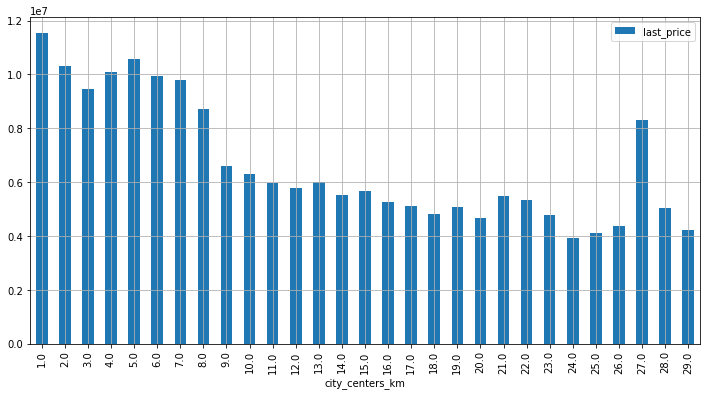

In [72]:
# столбцовая диаграмма с распределением цен по километрам в зависимости от удаленности от центра
(no_outliers_data.query('locality_clear == "Санкт-Петербург" and parks_around3000.notna()')
 .pivot_table(index='city_centers_km', 
              values='last_price')
 .plot(kind='bar', y='last_price', grid=True, figsize=(12, 6)));

Из таблицы и диаграммы видно, что цена заметно меняется после 8 км, эту границу и можно считать условным центром. Это почти соответствует площади административного Центрального района Санкт-Петербурга в 17,12 км².

<a id='407'></a>
### Изучение сегмента квартир в центре Санкт-Петербурга

In [73]:
# датафрейм с объявлениями в Санкт-Петербурге в пределах 8 км и вывод информации по изучаемым столбцам
center_flats = (no_outliers_data
                .query('locality_clear == "Санкт-Петербург" \
                       and parks_around3000.notna() \
                       and city_centers_km <= 8'))
rich_info(center_flats).loc[['total_area', 'last_price', 'rooms', 'ceiling_height']]

,dtypes,nans,zeros,count,mean,std,min,25%,50%,75%,max,col_desc
total_area,float64,0,0,3239.00,76.86,31.61,25.20,52.98,71.50,95.00,197.00,площадь квартиры в квадратных метрах (м²)
last_price,int64,0,0,3239.00,9891893.69,5666599.76,1800000.00,6200000.00,8300000.00,11759000.00,36000000.00,цена на момент снятия с публикации
rooms,int64,0,0,3239.00,2.52,1.04,1.00,2.00,2.00,3.00,5.00,число комнат
ceiling_height,float64,1171,0,2068.00,2.99,0.30,2.50,2.75,3.00,3.20,3.80,высота потолков (м)


In [74]:
# коэффициенты корреляции цены в центре с изучаемыми параметрами и сравнение с корреляциями с общими ценами
(center_flats.corr()
 .loc[['total_area', 'living_area', 'kitchen_area', 'rooms', 'city_centers_km']]
 ['last_price'].to_frame(name='center_price').join(
     no_outliers_data.corr()
     .loc[['total_area', 'living_area', 'kitchen_area', 'rooms', 'city_centers_km']]
     ['last_price'].to_frame(name='all_price')))

,center_price,all_price
total_area,0.72,0.77
living_area,0.61,0.66
kitchen_area,0.54,0.60
rooms,0.41,0.46
city_centers_km,-0.07,-0.35


При сравнении корреляций центральных и общих цен видно, что тенденции сохраняются, а коэффициенты выросли: в центре Санкт-Петербурга площадь квартиры и количество комнат влияет на цену более значительно, чем в целом по рынку недвижимости. А расстояние от центра влияет меньше, но это и понятно для данных только о центре города.

In [75]:
# сравнение влияния этажности на цены в центре и все цены
(center_flats.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'median']).join(
    no_outliers_data.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'median']), 
    lsuffix='_center', rsuffix='_all')
    .sort_values(by=('mean_center', 'last_price')))

,mean_center,median_center,mean_all,median_all
,last_price,last_price,last_price,last_price
floor_type,,,,
первый,7307014.19,6274500,4528934.53,3950000
последний,9762339.68,8300000,5334202.30,4250000
другой,10316331.45,8600000,5883044.89,4800000


Тенденция по этажности также сохраняется. Первый и последний этаж в центре всё ещё дешевле.

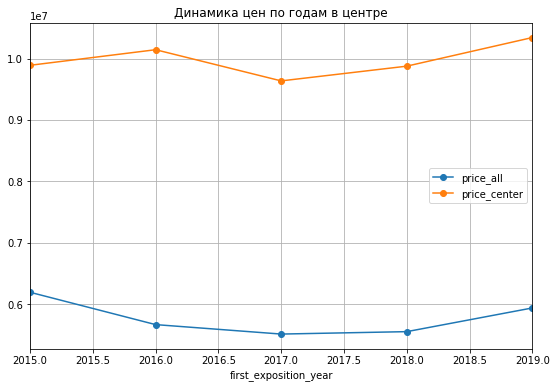

In [76]:
ax = (no_outliers_data.query('first_exposition_year != 2014')
      .groupby('first_exposition_year')
      ['last_price'].mean()
      .plot(figsize=(9, 6), grid=True, legend=True, style='o-'))
(center_flats.query('first_exposition_year != 2014')
 .groupby('first_exposition_year')
 ['last_price'].mean()
 .plot(ax=ax, figsize=(9, 6), grid=True, legend=True, style='o-'))
plt.title('Динамика цен по годам в центре')
plt.legend(['price_all', 'price_center'])
plt.show()

На графике с распределением цен по годам заметно, во-первых, что цены в центре Санкт-Петербурга заметно выше среднерыночных цен; во-вторых, динамика изменилась: цена наоборот немного выросла к 2016-му и более стабильно росла с 2017 по 2019.

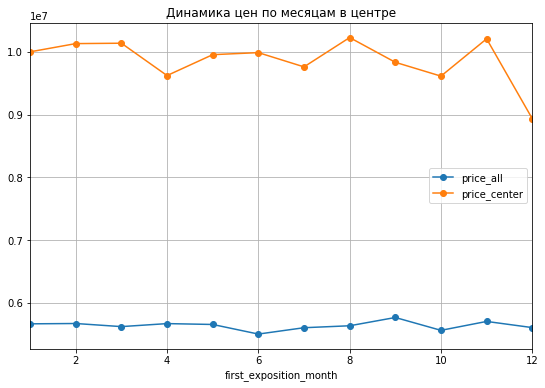

In [77]:
ax = (no_outliers_data.groupby('first_exposition_month')
      ['last_price'].mean()
      .plot(figsize=(9, 6), grid=True, legend=True, style='o-'))
(center_flats.groupby('first_exposition_month')
 ['last_price'].mean()
 .plot(ax=ax, figsize=(9, 6), grid=True, legend=True, style='o-'))
plt.title('Динамика цен по месяцам в центре')
plt.legend(['price_all', 'price_center'])
plt.show()

По месяцам динамика также отличается. Цены ниже в апреле, июле и октябре, а значитительное падение цен происходит в декабре. Дороже всего квартиры в центре выставляют в марте, августе и ноябре.

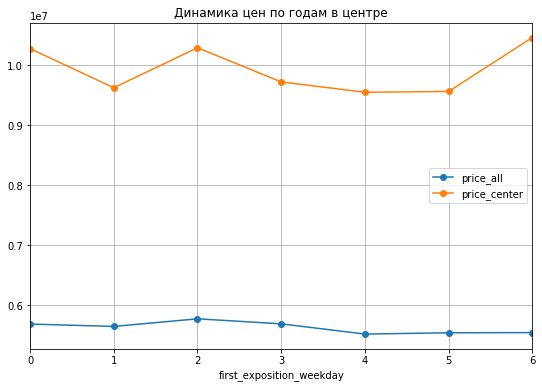

In [78]:
ax = (no_outliers_data.groupby('first_exposition_weekday')
      ['last_price'].mean()
      .plot(figsize=(9, 6), grid=True, legend=True, style='o-'))
(center_flats.groupby('first_exposition_weekday')
 ['last_price'].mean()
 .plot(ax=ax, figsize=(9, 6), grid=True, legend=True, style='o-'))
plt.title('Динамика цен по годам в центре')
plt.legend(['price_all', 'price_center'])
plt.show()

Здесь также динамика отличается. Здесь также в среду публикают квартиры подороже, но в отличие от общей ситуации по рынку, самые дорогие — в воскресенье.

В целом средние цены в центре Санкт-Петербурга заметно выше среднерыночных. Все указанные факторы сохраняют влияние на цены квартир, но их характер отличается. Большая площадь квартир и большее количество комнат в центре Санкт-Петербурга ценятся еще больше, чем в среднем по рынку; квартиры в относительной дальности от центра стоят дешевле, но влияние этого фактора упало — это ожидаемо, если данные выбраны только в центре. Первый и последний этажи в центре города также дешевле, чем другие этажи. 

А даты публикаций влияют иначе: более дешевые квартиры публикуют в апреле, июле, октябре и особенно декабре; более дорогие квартиры появились в марте, августе и ноябре в конце недели. Также центральные квартиры меняют среднегодовые цены не так же, как в среднем по рынку.

<a id='part_5'></a>
## Шаг 5. Общий вывод

В анализе использовалась информация о продаже квартир в Санкт-Петербурге и Ленобласти с конца 2014 по середину 2019 года.

В данных обнаружились значительные пробелы, на которые необходимо обратить внимание. Почти четверть геоданных оказались полностью пустыми; получилось выделить список населенных пунктов, для которых полностью отсутствуют геоданные. Это повод для багрепорта и поиска проблемы.

Также данные оказались неравномерно распределены, треть из них оказались выбросами, которые пришлось исключить из анализа. Эти данные, тем не менее, можно рассматривать отдельно для проведения других исследований — например, сверхдорогой роскошной недвижимости или рынка очень маленьких квартир.

Вот что можно сказать о проанализированных данных:
- В основном продают 1- и 2-комнатные квартиры с потолками высотой от 2,5 до 2,7 метров, площадью от 38 до 61 м² и стоимостью от 3,2 до 5,6 млн;
- Нормальный срок продажи квартиры на сайте — от 1 до 7 месяцев, при этом чаще всего успевают продавать квартиры в пределах 3 месяцев. Наиболее частый срок размещения — 45 дней. Долгие продажи — от 7 до 14 месяцев, экстремально долгие — свыше 15 месяцев. Дольше (даже в пределах нормы) продаются более дорогие квартиры с лучшими условиями. Быстрой можно считать продажу в течение месяца, из них много объявлений снимаются с публикации в течение первой недели.
- Прощадь квартиры, количество комнат, удаленность от центра, время размещения и этажность дома действительно являются факторами, которые влияют на цену. Она прямо пропорциональна росту площади квартиры и количеству комнат, обратно пропорциональна расстоянию от центра города. Дата публикации позволяет оценить динамику цен за несколько лет, в течение одного года, в течение одной недели. Эти факторы значимы как для рынка в целом, так и при исследовании узкого диапазона квартир в центре Санкт-Петербурга.
- Получилось выделить рейтинг из 10 населенных пунктов с наибольшей и наименьшей ценой. Самые дорогие квартиры в Ленобласти — в Санкт-Петербурге и его пригородах.
- Временные факторы иначе влияют на рынок квартир в центре Санкт-Петербурга (в радиусе 8 км): похоже, что условия купли-продажи здесь не подчиняются общим тенденциям рынка. Факторы, влияющие на цену, здесь ещё более сильны.